In [176]:
import pandas as pd
import numpy as np
import os

# Loading the dataset
file_path = r"D:/ML/laptop_price.csv"
df = pd.read_csv(file_path)
print(df.head())

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  


In [175]:
# Calculate the total number of missing values
print(df.isnull().sum())

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64


In [174]:
# Calculate the number of duplicate rows
print(df.duplicated().sum())


0


D:\Users\MUIZZ KHAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


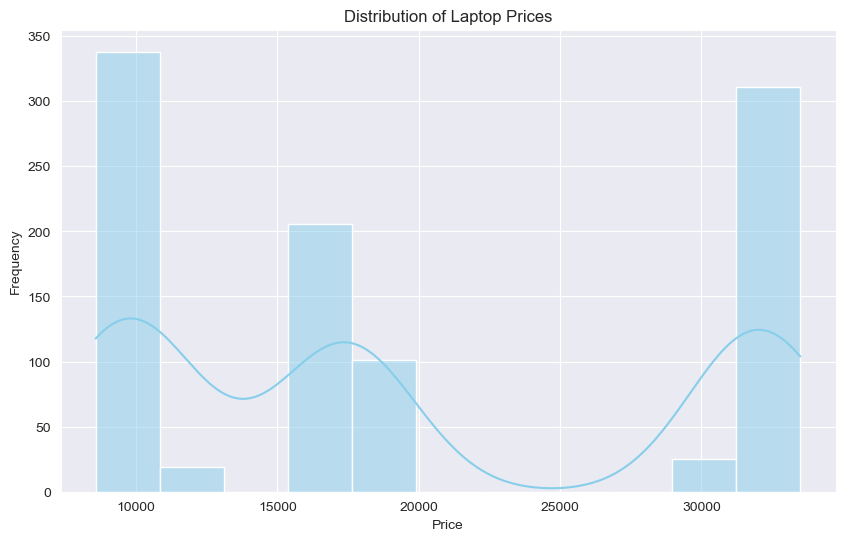

In [173]:

# Visual representation
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("darkgrid")

# Distribution of laptop prices (histogram or kernel density plot)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



In [171]:
# Explore how prices vary across different categories (box plots)
categories = ['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cross_val_score_mean = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10))

evaluation_metrics = {
    "R2 Score": r2,
    "Mean Absolute Error": mae,
    "Mean Squared Error": mse,
    "Cross Validation Score": cross_val_score_mean
}

print(evaluation_metrics)

# Example user input
user_input = {
    'Brand': 'Lenovo',
    'Processor_Speed': 3.01,
    'RAM_Size': 4,
    'Storage_Capacity': 256,
    'Weight': 2.94,
    'Screen_Size': 15.58
    # Include all other necessary features
}

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Apply the same transformations to the user input
user_df = trf.transform(user_df)
user_df_scaled = scaler.transform(user_df)

# Predict the price
predicted_price = model.predict(user_df_scaled)[0]
print(f'Predicted Price: {predicted_price}')

# Calculate regression accuracy
tolerance = 0.1
accurate_predictions = np.abs((y_test - y_pred) / y_test) < tolerance
accuracy = np.mean(accurate_predictions)

evaluation_metrics["Accuracy"] = accuracy
print("Accuracy =",accuracy)

{'R2 Score': 0.9995787727637543, 'Mean Absolute Error': 153.07958672767947, 'Mean Squared Error': 37170.12142299258, 'Cross Validation Score': 0.9995233689518779}
Predicted Price: 9236.144897250328
Accuracy = 1.0
